In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Sentiment Pkgs
from textblob import TextBlob

In [3]:
df_train = pd.read_csv('drugsComTrain_raw.csv')
df_test = pd.read_csv('drugsComTest_raw.csv')

In [4]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


### Data Exploration and Visualization

In [6]:
df_train.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [8]:
list(df_train.columns)

['uniqueID',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

In [9]:
df_train.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

#### Observation :

+ Most of the missing values are in the condition column
+ This implies that most people don't know their condition by name or privacy

In [10]:
total_drugs = df_train['drugName'].unique()

print('Total number of drugs are: ',len(total_drugs))

Total number of drugs are:  3436


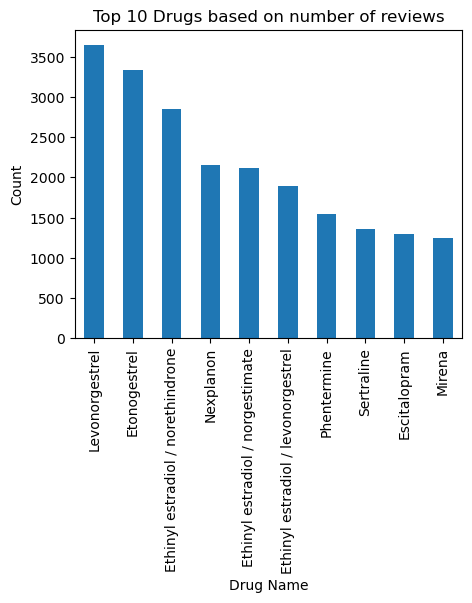

In [11]:
plt.figure(figsize = (5,4))
df_train['drugName'].value_counts().nlargest(10).plot(kind = 'bar')
plt.title('Top 10 Drugs based on number of reviews')
plt.xlabel('Drug Name')
plt.ylabel('Count')
plt.show()

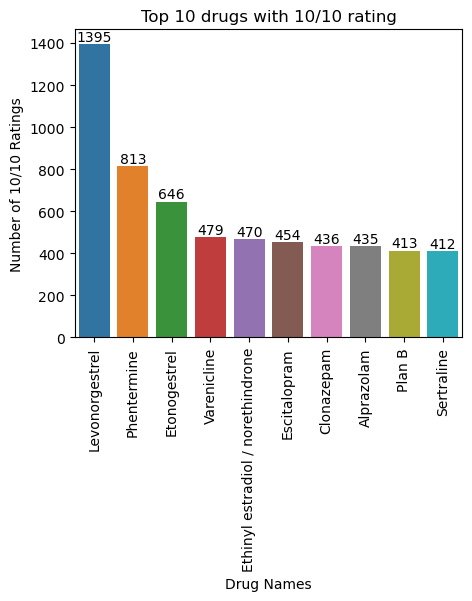

In [12]:
plt.figure(figsize = (5,4))

rating = dict(df_train.loc[df_train.rating == 10, 'drugName'].value_counts())
drug_Name = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drug_Name[0:10], y = drug_rating[0:10])

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 10 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of 10/10 Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

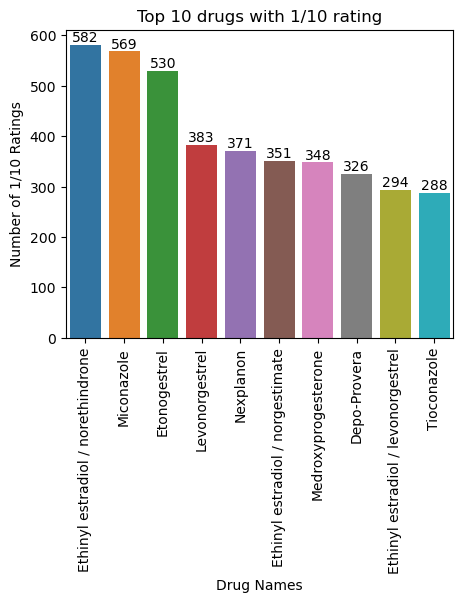

In [13]:
plt.figure(figsize = (5,4))

rating = dict(df_train.loc[df_train.rating == 1, 'drugName'].value_counts())
drug_Name = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drug_Name[0:10], y = drug_rating[0:10])

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 10 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of 1/10 Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

In [14]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [15]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return drug_suffix[i]

In [16]:
df_train['drug_class'] = df_train['drugName'].apply(classify_drug)

In [17]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,drug_class
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,arb blocker
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,None
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,None
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,None
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,None


In [18]:
# How many Groups of Drugs By Class
list(df_train['drug_class'].unique())

['arb blocker',
 None,
 'antifungal (except metronidazole)',
 'oral hypoglycemics',
 'opiod analgesics',
 'antibiotic',
 'anti-anxiety',
 'h2 blockers (anti-ulcers)',
 'beta blockers',
 'ace inhibitor',
 'thrombolytics',
 'alpha blocker',
 'corticosteroid (prednisone)',
 'antipyschotics (phenothiazine)',
 'antibiotic(penicillins)',
 'barbiturate',
 'calcium channel blocker',
 'anesthetic',
 'pituitary hormone',
 'antibiotic (cephalosporins)',
 'beta blocker',
 'neuromuscular blocking agents',
 'anticoagulants']

In [19]:
# How many Groups of Drugs By Class
grp_drugs = len(df_train['drug_class'].unique())
print('Groups of Drugs by Class: ',grp_drugs)

Groups of Drugs by Class:  23


In [20]:
# Which of class of drug  is the most commonest
df_train['drug_class'].value_counts()

drug_class
antifungal (except metronidazole)    4201
opiod analgesics                     3945
oral hypoglycemics                   3555
antibiotic                           3401
anti-anxiety                         2645
h2 blockers (anti-ulcers)            1228
beta blockers                         966
corticosteroid (prednisone)           886
antipyschotics (phenothiazine)        664
arb blocker                           560
ace inhibitor                         432
calcium channel blocker               233
alpha blocker                         153
anesthetic                            129
antibiotic(penicillins)               119
thrombolytics                         116
beta blocker                           97
neuromuscular blocking agents          45
antibiotic (cephalosporins)            29
pituitary hormone                      28
barbiturate                            19
anticoagulants                          9
Name: count, dtype: int64

#### Observations :

+ The most commonest class/group of drugs used are 
    - **Antifungal**
    - **Opiod Analgesics(Pain Killers)**
    - **Oral Hypoglycemics (DM)**
    - **Antibiotic**

In [21]:
condition_count = df_train['condition'].unique()
print('Total number of conditions suffered: ', len(condition_count))

Total number of conditions suffered:  885


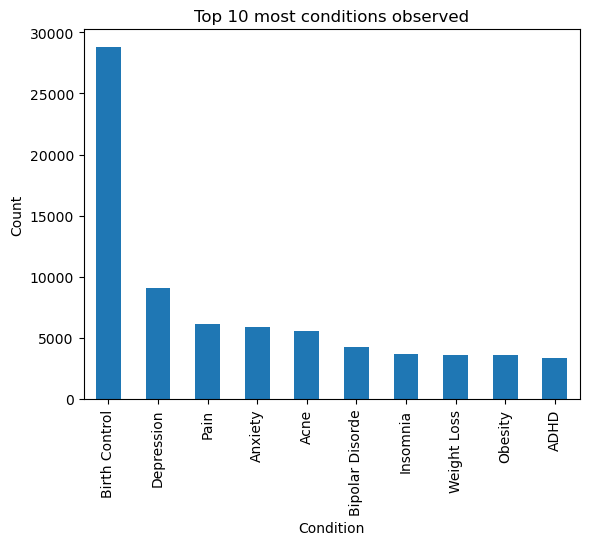

In [22]:
plt.figure()
df_train['condition'].value_counts().nlargest(10).plot(kind = 'bar')
plt.title('Top 10 most conditions observed')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

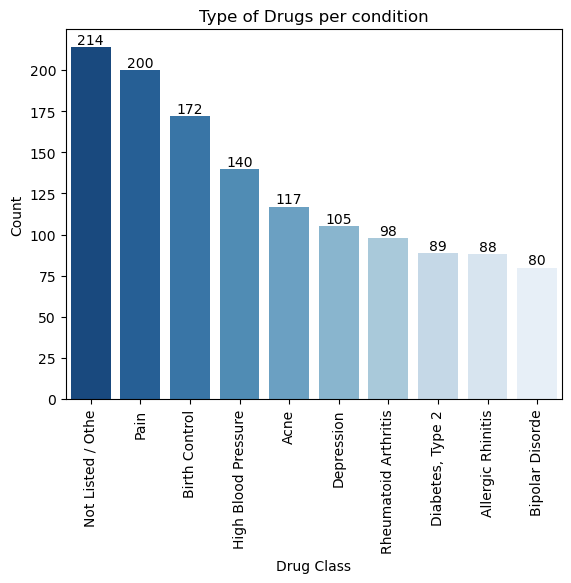

In [23]:
drug_per_cond = df_train.groupby('condition')['drugName'].nunique().nlargest(10)

# How many Drugs per condition (Top 20)
plt.figure()

sns_1 = sns.barplot(x=drug_per_cond.index,y=drug_per_cond.values, palette = 'Blues_r')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Type of Drugs per condition')
sns_1.set_xlabel("Drug Class")
sns_1.set_ylabel("Count")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

#### Observation :

+ **Pain, Birth Control** and **HBP** have the highest number of different/unique drugs for their condition


### Date Time

In [24]:
df_train['date'] = pd.to_datetime(df_train['date'], errors = 'coerce')

C:\Users\aksha\AppData\Local\Temp\ipykernel_4252\586794948.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['date'] = pd.to_datetime(df_train['date'], errors = 'coerce')


In [25]:
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day

In [30]:
df_train

,uniqueID,drugName,condition,review,rating,date,usefulCount,drug_class,year,month,day
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,arb blocker,2012,5,20
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,None,2010,4,27
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,None,2009,12,14
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,None,2015,11,3
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,None,2016,11,27
...,...,...,...,...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125,None,2015,5,31
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34,oral hypoglycemics,2011,11,1
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35,None,2014,3,15
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79,None,2015,9,19


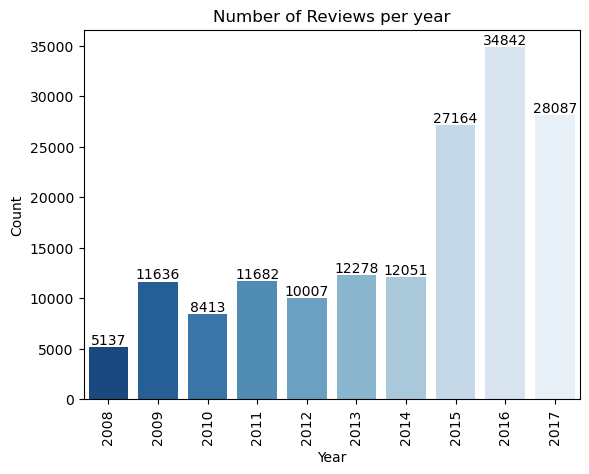

In [47]:
reviews_per_year = df_train['year'].value_counts()
plt.figure()

sns_1 = sns.barplot(x=reviews_per_year.index,y=reviews_per_year.values, palette = 'Blues_r')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Number of Reviews per year')
sns_1.set_xlabel("Year")
sns_1.set_ylabel("Count")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

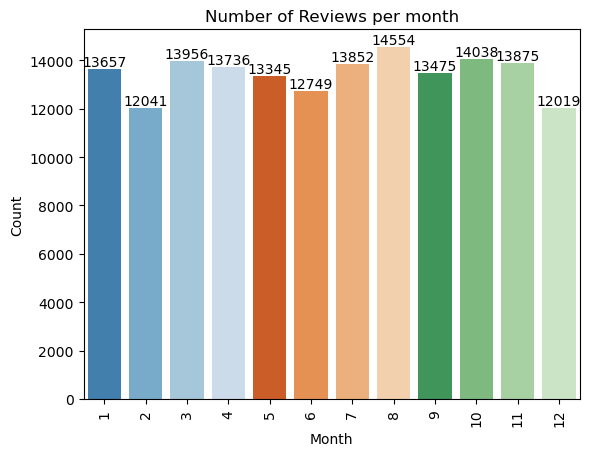

In [52]:
reviews_per_month = df_train['month'].value_counts()
plt.figure()

sns_1 = sns.barplot(x=reviews_per_month.index,y=reviews_per_month.values, palette = 'Blues_r')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Number of Reviews per month')
sns_1.set_xlabel("Month")
sns_1.set_ylabel("Count")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

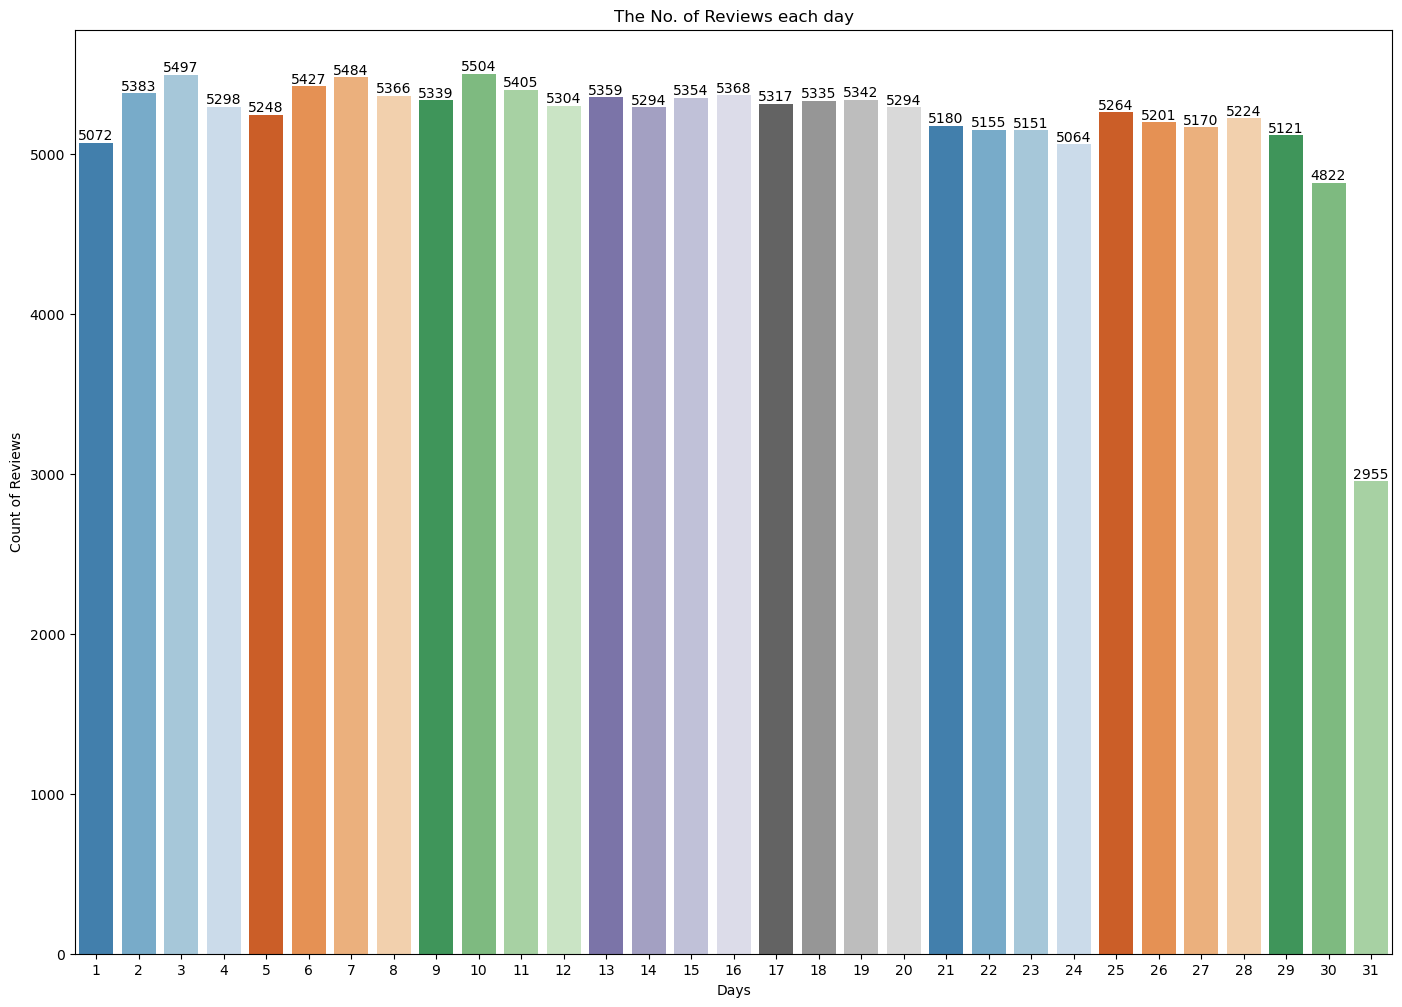

In [67]:
reviews_per_day = df_train['day'].value_counts()

plt.figure(figsize=(17,12))

sns_1 = sns.barplot(x=reviews_per_day.index,y=reviews_per_day.values, palette ='tab20c')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
plt.title('The No. of Reviews each day')
plt.xlabel('Days')
plt.ylabel('Count of Reviews')
plt.show()

In [74]:
df_train.loc[(df_train['rating'] >= 5), 'Review_Sentiment'] = 1
df_train.loc[(df_train['rating'] < 5), 'Review_Sentiment'] = 0

df_train['Review_Sentiment'].value_counts()

Review_Sentiment
1.0    121222
0.0     40075
Name: count, dtype: int64

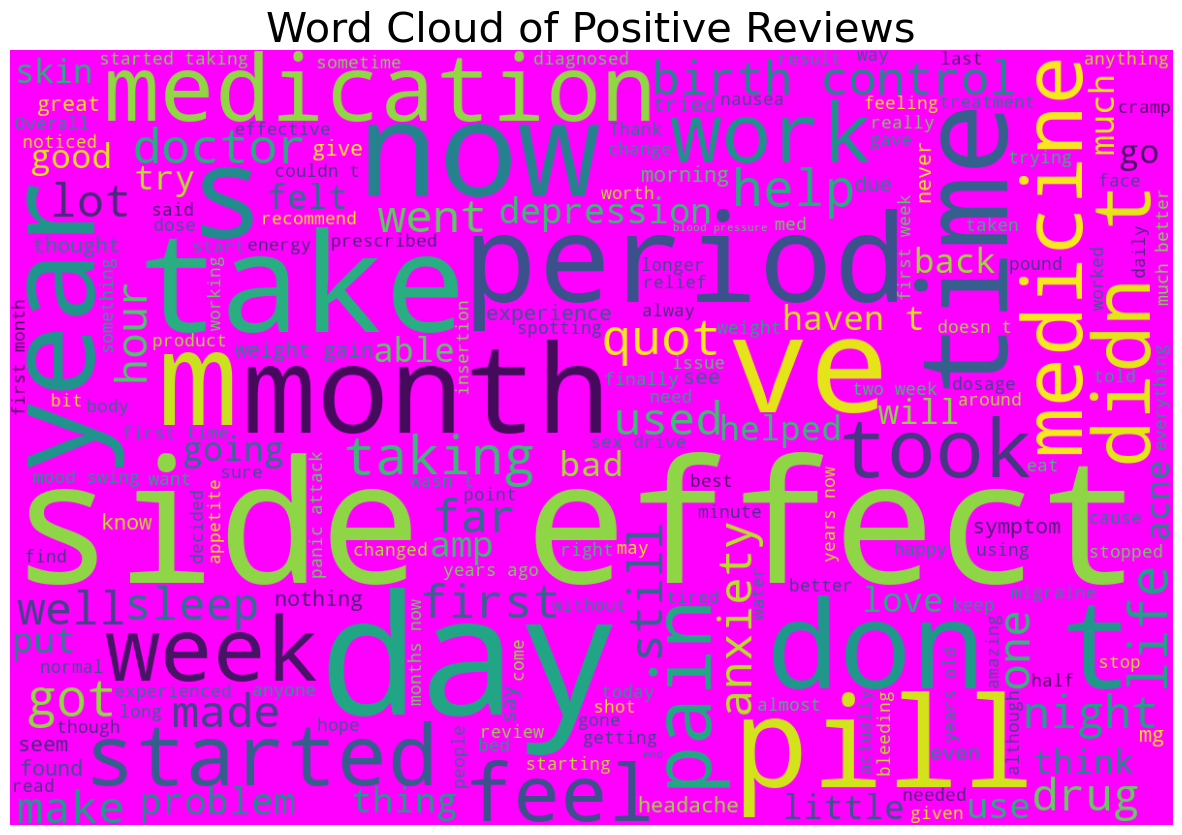

In [76]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in df_train['review'][df_train['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

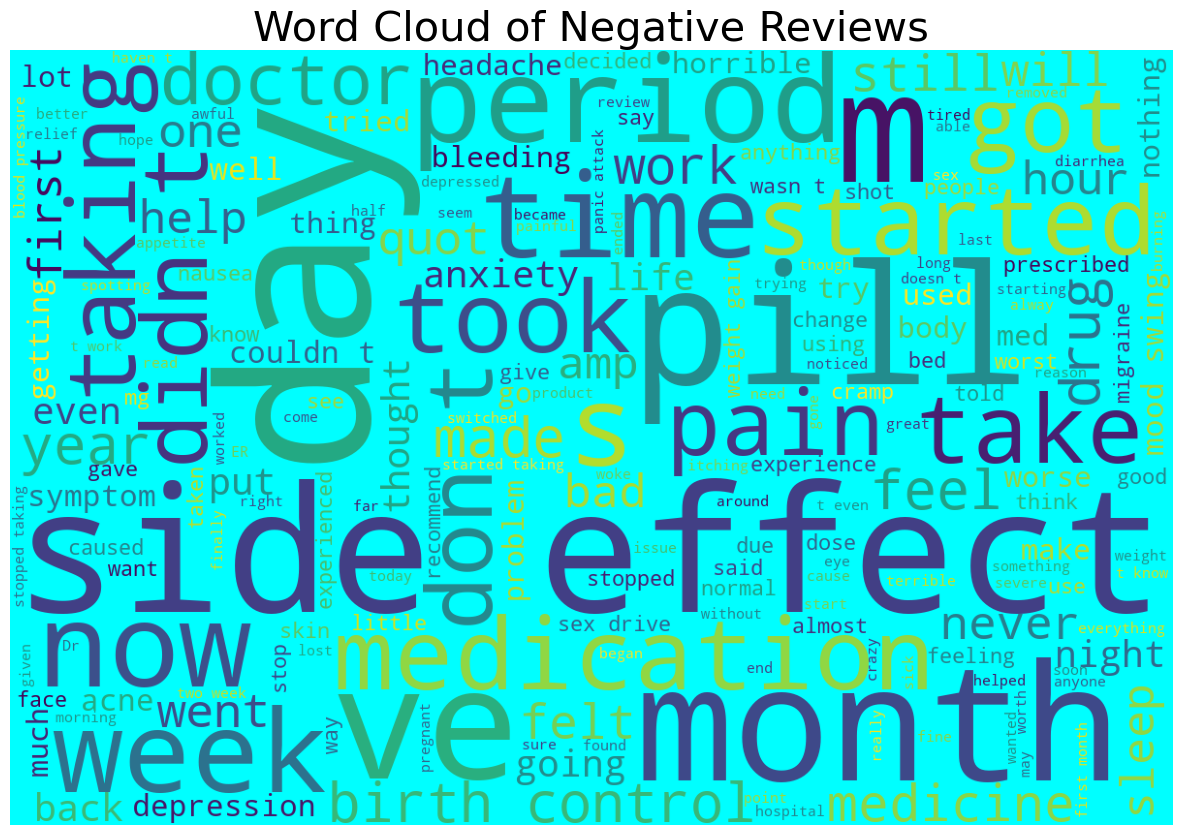

In [77]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in df_train['review'][df_train['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [79]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [80]:
df_train['review_clean'] = review_clean(df_train['review'])

In [81]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
df_train['review_clean'] = df_train['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

<ul>
    <li style="font-size:150%;">I have used textblob module to give the sentiment polarity of the review. This polarity is given to both the cleaned and uncleaned review</li>
<ul> 

In [83]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
df_train['review_clean'] = df_train['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [90]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,drug_class,year,month,day,Review_Sentiment,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,arb blocker,2012,5,20,1.0,"""it side effect, take combin bystol 5 mg fish ..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,None,2010,4,27,1.0,"""mi son halfway fourth week intuniv. becam con..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,None,2009,12,14,1.0,"""i use take anoth oral contraceptive, 21 pill ..."
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,None,2015,11,3,1.0,"""this first time use form birth control. im gl..."
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,None,2016,11,27,1.0,"""suboxon complet turn life around. feel health..."


In [92]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [94]:
df_train['sentiment'] = sentiment(df_train['review'])

In [95]:
df_train['sentiment_clean'] = sentiment(df_train['review_clean'])

In [96]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
df_train['review_clean_ss'] = review_clean(df_train['review'])
df_train['sentiment_clean_ss'] = sentiment(df_train['review_clean_ss'])

In [97]:
df_train = df_train.dropna(how="any", axis=0)

In [98]:

#Word count in each review
df_train['count_word']=df_train["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
df_train['count_unique_word']=df_train["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_train['count_letters']=df_train["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
df_train["count_punctuations"] = df_train["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_train["count_words_upper"] = df_train["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_train["count_words_title"] = df_train["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_train["count_stopwords"] = df_train["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
df_train["mean_word_len"] = df_train["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

<ul>
    <li style="font-size:150%;">The new features engineered are 'count_word' which is the number of words in each review, 'count_unique_word' which is the number of the unique words in the reviews. 'count_letters' is the letter count, 'punctuation_count' is the punctuation count, 'count_words_upper' is the upper case word count,'count_words_title' is the title case word counts, 'count_stopwords' is the number of stop words in the review, and the 'mean_word_len' is the average length of the words in the review. The date is also divided into three columns which are day, month and year for separate features for training.</li>
<ul> 

In [99]:
df_train.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'drug_class', 'year', 'month', 'day', 'Review_Sentiment',
       'review_clean', 'sentiment', 'sentiment_clean', 'review_clean_ss',
       'sentiment_clean_ss', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len'],
      dtype='object')

<h1 style="font-size:180%; color:orange;"><i><b>CORRELATION MATRIX</b></i></h1>

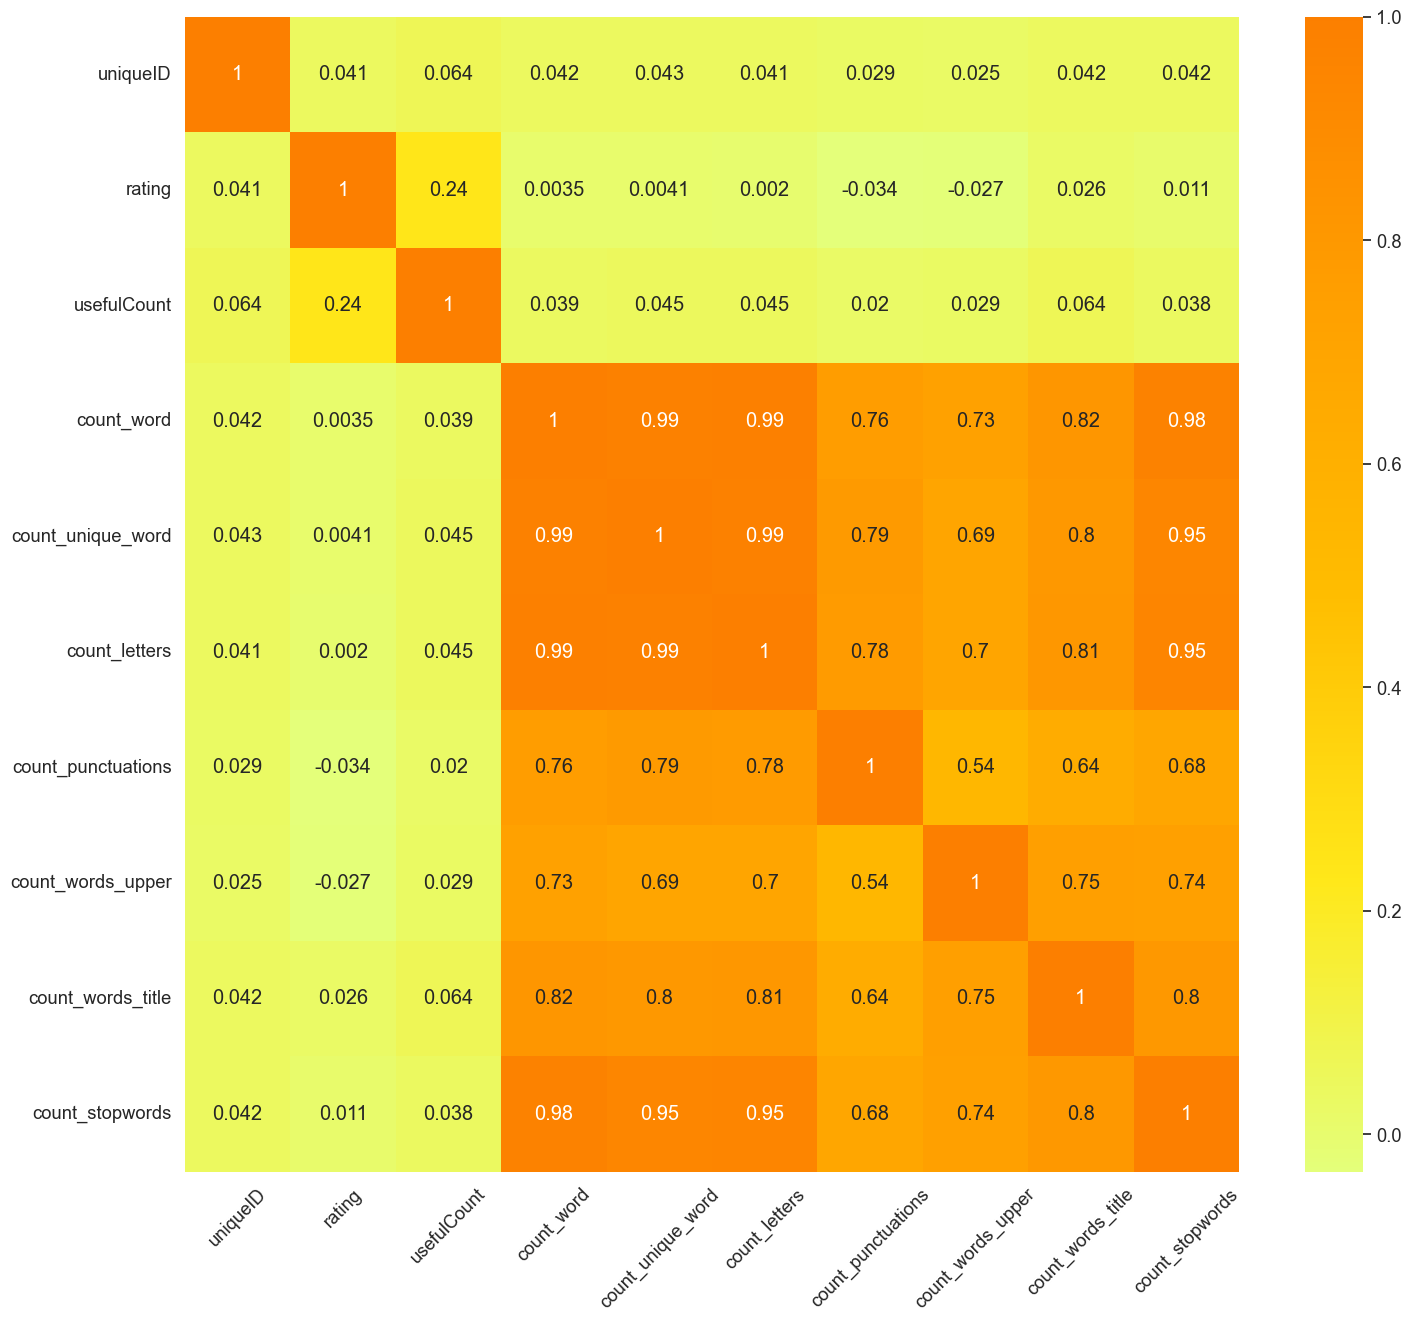

In [100]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = df_train.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

<ul>
    <li style="font-size:150%;">Correlation Heatmap is plotted using seaborn which contains all the new features engineered and the old features.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>LABEL ENCODING</b></i></h1>

In [102]:

# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df_train[feature] = label_encoder_feat[feature].fit_transform(df_train[feature])

<ul>
    <li style="font-size:150%;">The Label Encoder is used to change the categorical values of Drug Names and the conditions in to numerical values for the machine learning modelling. There are 3,667 unique drugs in the dataset that's why One hot encoder is not used as it would generate 3,667 new features and it would be very computationally expensive.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>LIGHT GBM MODEL</b></i></h1>

<ul>
    <li style="font-size:150%;">LightGBM is a gradient boosting framework that uses treebased learning algorithms. It's designed to be distributed and efficient. It has many advantages like faster training speed and higher efficiency, lower memory usage, better accuracy and support of parallel and GPU learning, since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit.</li>
<ul>

In [107]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [109]:
# Defining Features and splitting the data as train and test set

features = df_train[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = df_train['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (16337, 15)
The Test set size  (7002, 15)


<ul>
    <li style="font-size:150%;">70% of the dataset is used for the training and the rest of the data i.e. 30% is used for the testing purpose. The shape of the training set is (149708, 15) and the shape of  the test set is (64161, 15).</li>
<ul>

In [110]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.7850614110254213
The confusion Matrix is 


array([[ 738,  980],
       [ 525, 4759]], dtype=int64)

<ul>
    <li style="font-size:150%;">The Confusion Matrix for the LGBM model is given above, it can be seen that the accuracy of the LGBM is 0.9014 (90%).</li>
<ul>

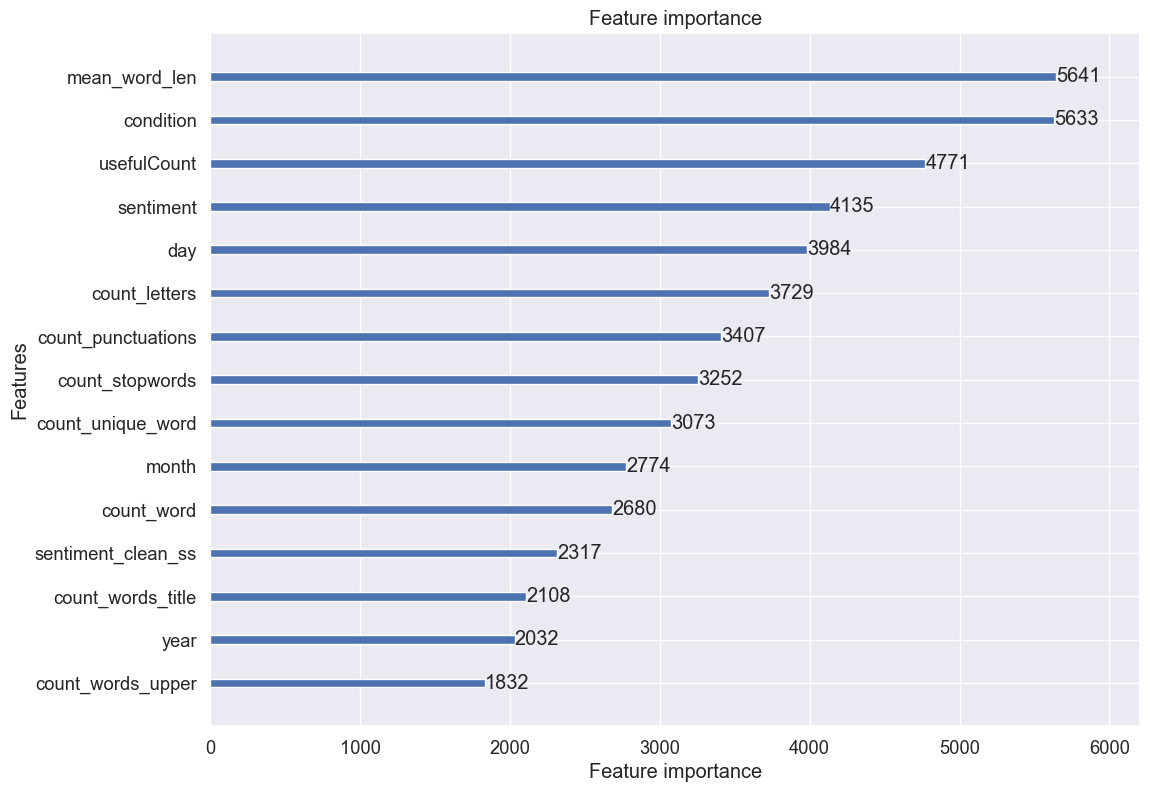

In [111]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);